In [2]:
from nilearn import datasets
from nilearn import image
from nilearn import plotting
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas

from matplotlib import patches, ticker
import matplotlib.pyplot as plt

import numpy as np
import time

from nilearn.image import get_data
from nilearn.regions import Parcellations

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold, datasets

from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiLabelsMasker
from nilearn.regions import RegionExtractor

import os

Question 1

In [3]:
from nilearn import datasets

rest_dataset = datasets.fetch_development_fmri(n_subjects=40, data_dir = 'dev_data', age_group = 'child')
func_filenames, confounds = rest_dataset.func, rest_dataset.confounds

#All the scans we downloaded
for filename in func_filenames:
    print(filename)

 ...done. (1 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


dev_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar002_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar003_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar004_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar005_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar006_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar007_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar008_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar009_

 ...done. (3 seconds, 0 min)


First functional nifti image (4D) is at the path: dev_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
(50, 59, 50)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


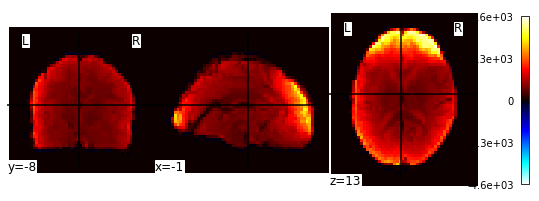

In [4]:
from nilearn import image
from nilearn import plotting

# Obtaining the path and the visualization for the first of these nifti files
print('First functional nifti image (4D) is at the path: %s' %rest_dataset.func[0])  # 4D data

first_rsn = image.index_img(rest_dataset.func[0], 0)
print(first_rsn.shape)
plotting.plot_stat_map(first_rsn)

Your task:

Instantiate a CanICA model with 20 components using Nilearn, and fit it to the functional data we imported. use the 'whole-brain-template' as the masking strategy. Fit it to the data.

Visualize the results of the canICA components using plot_prob_atlas.

Try varying the number of components. Try at least 3 values (say n= 2, 20, 50) What do you observe in the visualizations? How would you know how many components to use in this case? How do they choose them in Varoquaux's study?

Fitting the CanICA Model to our 40 subjects...
[MultiNiftiMasker.fit] Loading data from [dev_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar002_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar003_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar004_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar005_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar006_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar007_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar008_task-pixar_spac

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x156069bd0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


Template whole-brain mask computation


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nilearn/masking.py:562: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resampling.resample_to_img, memory)(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/memory.py:810: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x156069bd0>, mask_type='whole-brain'), ignore list will not work.
  argument_dict = filter_args(self.func, self.ignore,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/memory.py:632: UserWarning: Canno

[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('dev_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('dev_data/development_fmri/development_fmri/sub-pixar002_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('dev_data/development_fmri/development_fmri/sub-pixar003_task-pixar_space-MNI152NLin2009cAsy

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


__________________________________________________________fastica - 5.2s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=398764591)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


__________________________________________________________fastica - 4.2s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=924231285)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.6s remaining:    0.0s


__________________________________________________________fastica - 4.2s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=1478610112)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.0s remaining:    0.0s


__________________________________________________________fastica - 4.4s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=441365315)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.6s remaining:    0.0s


__________________________________________________________fastica - 4.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=1537364731)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.4s remaining:    0.0s


__________________________________________________________fastica - 4.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=192771779)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   32.6s remaining:    0.0s


__________________________________________________________fastica - 5.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=1491434855)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   37.7s remaining:    0.0s


__________________________________________________________fastica - 5.0s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=1819583497)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   42.6s remaining:    0.0s


__________________________________________________________fastica - 4.9s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=530702035)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   47.2s finished


__________________________________________________________fastica - 4.6s, 0.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),


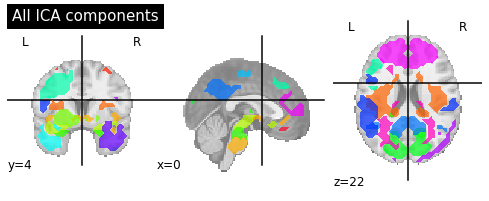

In [5]:
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas

# Create the ICA model
canica = CanICA(n_components=20,
                memory="nilearn_cache", 
                memory_level=2,
                verbose=10,
                mask_strategy='whole-brain-template',
                random_state=0)

print(f'Fitting the CanICA Model to our {len(func_filenames)} subjects...')

# Fit the model to our data
canica.fit(func_filenames)


canica_components_img = canica.components_img_
plot_prob_atlas(canica_components_img, title='All ICA components')

In this question we are going to use a few of the clustering methods we saw in class to create a set of parcels in a brain. The content is adapted from the Nilearn tutorial: https://nilearn.github.io/dev/auto_examples/03_connectivity/plot_data_driven_parcellations.html



In [6]:
from matplotlib import patches, ticker
import matplotlib.pyplot as plt

import numpy as np
import time

from nilearn.image import get_data
from nilearn import plotting
from nilearn.regions import Parcellations
from nilearn import datasets

dataset = datasets.fetch_development_fmri(n_subjects=1)

# print basic information on the dataset
print('First subject functional nifti image (4D) is at path: %s' %dataset.func[0])  # 4D data


Dataset created in /Users/lydiarader/nilearn_data/development_fmri


Dataset created in /Users/lydiarader/nilearn_data/development_fmri/development_fmri



 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


First subject functional nifti image (4D) is at path: /Users/lydiarader/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


 ...done. (2 seconds, 0 min)


Use Nilearn's Parcellations method to instantiate a Ward Clustering model, and fit it to the data we imported. Use 1000 parcels and Full Width at Half Maximum smoothing of 2.
Instantiate and fit a model for k-means clustering using 50 parcels and Full Width at Half Maximum smoothing of 10. Make sure the data is centered and normed.

In [7]:
ward = Parcellations(method='ward', n_parcels=1000, standardize=False, smoothing_fwhm=2.)
kmeans = Parcellations(method='kmeans', n_parcels=50, standardize=True, smoothing_fwhm=10.)

ward.fit(dataset.func)
kmeans.fit(dataset.func)

[MultiNiftiMasker.fit] Loading data from [/Users/lydiarader/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/lydiarader/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[Parcellations] computing ward
[MultiNiftiMasker.fit] Loading data from [/Users/lydiarader/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[

Parcellations(method='kmeans', smoothing_fwhm=10.0, standardize=True)

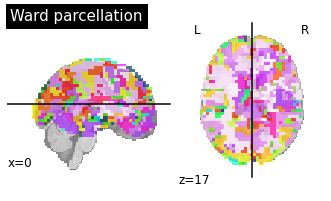

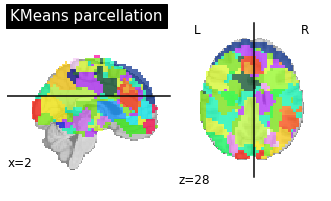

In [8]:
ward_labels_img = ward.labels_img_
kmeans_labels_img = kmeans.labels_img_

first_plot = plotting.plot_roi(ward_labels_img, title="Ward parcellation", display_mode='xz')
display = plotting.plot_roi(kmeans_labels_img, title="KMeans parcellation", display_mode='xz')

Last week we had a question on spectral embeddings, this week we will go a bit deeper into the world of manifolds. This is adapted from: https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html .

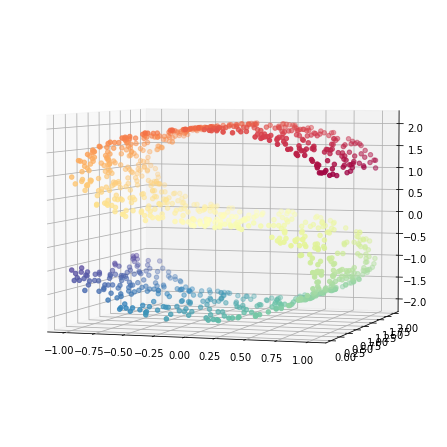

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold, datasets

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(45, 24))

# Add 3d scatter plot
ax = fig.add_subplot(251, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

Using the libraries imported above, fit and apply three diferent manifold transformations to the S data, and plot graphs to visualize what they do. Use the same number of neighbours and components for each model.
Investigate the 3 methods you chose. What sort of scenarios are they typically used in?

1. Spectral: useful when individual clusters are non-convex
2. Isomap: dimensionality reduction while maintaining non-linear relationships
3. LTSA local linear embedding: good for understanding the differences of multivariate patterns



(-0.015494609747393723,
 0.01642295904371728,
 -0.016093908212567922,
 0.017602663696476374)

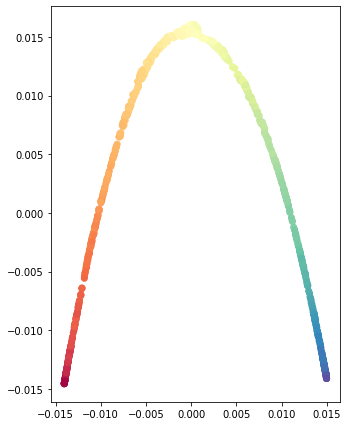

In [42]:
# Create figure
fig = plt.figure(figsize=(30, 16))

#manifold methods
#LLE = manifold.LocallyLinearEmbedding(method="standard",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.LocallyLinearEmbedding(method="ltsa",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.LocallyLinearEmbedding(method="hessian",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.LocallyLinearEmbedding(method="modified",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.Isomap(n_neighbors=n_neighbors,n_components=n_components)
#LLE = manifold.MDS(n_components=n_components, max_iter=100, n_init=1)
LLE = manifold.SpectralEmbedding(n_neighbors=n_neighbors,n_components=n_components)
#LLE = manifold.TSNE(n_components=n_components, init="pca", random_state=0)

Y = LLE.fit_transform(X)

ax = fig.add_subplot(2, 5, 2)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.axis("tight")

(-5.3131956342419295,
 5.378595336120858,
 -1.140141320157811,
 1.1752546952998966)

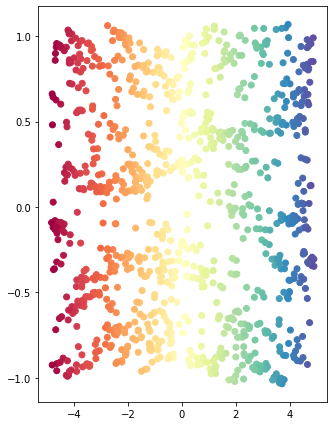

In [44]:
# Create figure
fig = plt.figure(figsize=(30, 16))

#manifold methods
#LLE = manifold.LocallyLinearEmbedding(method="standard",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.LocallyLinearEmbedding(method="ltsa",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.LocallyLinearEmbedding(method="hessian",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.LocallyLinearEmbedding(method="modified",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
LLE = manifold.Isomap(n_neighbors=n_neighbors,n_components=n_components)
#LLE = manifold.MDS(n_components=n_components, max_iter=100, n_init=1)
#LLE = manifold.SpectralEmbedding(n_neighbors=n_neighbors,n_components=n_components)
#LLE = manifold.TSNE(n_components=n_components, init="pca", random_state=0)

Y = LLE.fit_transform(X)

ax = fig.add_subplot(2, 5, 2)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.axis("tight")

(-0.061170964022320695,
 0.060115514980859,
 -0.05954566835533915,
 0.05742654197774133)

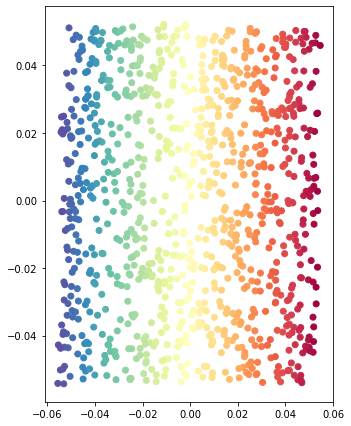

In [43]:
# Create figure
fig = plt.figure(figsize=(30, 16))

#manifold methods
#LLE = manifold.LocallyLinearEmbedding(method="standard",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
LLE = manifold.LocallyLinearEmbedding(method="ltsa",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.LocallyLinearEmbedding(method="hessian",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.LocallyLinearEmbedding(method="modified",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.Isomap(n_neighbors=n_neighbors,n_components=n_components)
#LLE = manifold.MDS(n_components=n_components, max_iter=100, n_init=1)
#LLE = manifold.SpectralEmbedding(n_neighbors=n_neighbors,n_components=n_components)
#LLE = manifold.TSNE(n_components=n_components, init="pca", random_state=0)

Y = LLE.fit_transform(X)

ax = fig.add_subplot(2, 5, 2)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.axis("tight")

First, we are going to create an extractor from the CanICA we ran earlier
This will allow us to create parcellated time series for each subject

In [11]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.input_data import NiftiLabelsMasker
from nilearn.regions import RegionExtractor

# Create an extractor which will allow us to create ICA network timeseries
extractor = RegionExtractor(canica_components_img, 
                            threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, 
                            min_region_size=1350)

print(f'Fitting the Extactor...')

# Fit the extractor
extractor.fit()

# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_

# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

print(f'{n_regions_extracted} Regions extracted...')

Fitting the Extactor...
29 Regions extracted...


In [12]:
import os 

# Store sub (key), and adjacency matrix (val)
mat_dict = {}

# ConnectivityMeasure
connectome_measure = ConnectivityMeasure(kind='correlation')
func_filenames, confounds = rest_dataset.func, rest_dataset.confounds

# Loop through each subject
for filename, confound in zip(func_filenames, confounds):

    # Get cleaner version of subject name
    sub = filename.split(os.path.sep)[-1]
    sub = sub.split('_')[0]
    
    print(f'Creating correlation matrix for: {sub}')

    # Extract timeseries signals from our extractor
    timeseries_each_subject = extractor.transform(filename, confounds=confound)
    
    # Create our Connectivity Measure from this extracted time series
    mat = connectome_measure.fit_transform([timeseries_each_subject])
    mat = mat.squeeze(axis = 0)
    
    # Add to our dict
    mat_dict[sub] = mat

Creating correlation matrix for: sub-pixar001
Creating correlation matrix for: sub-pixar002
Creating correlation matrix for: sub-pixar003
Creating correlation matrix for: sub-pixar004
Creating correlation matrix for: sub-pixar005
Creating correlation matrix for: sub-pixar006
Creating correlation matrix for: sub-pixar007
Creating correlation matrix for: sub-pixar008
Creating correlation matrix for: sub-pixar009
Creating correlation matrix for: sub-pixar010
Creating correlation matrix for: sub-pixar011
Creating correlation matrix for: sub-pixar012
Creating correlation matrix for: sub-pixar013
Creating correlation matrix for: sub-pixar014
Creating correlation matrix for: sub-pixar015
Creating correlation matrix for: sub-pixar016
Creating correlation matrix for: sub-pixar017
Creating correlation matrix for: sub-pixar018
Creating correlation matrix for: sub-pixar019
Creating correlation matrix for: sub-pixar020
Creating correlation matrix for: sub-pixar021
Creating correlation matrix for: s

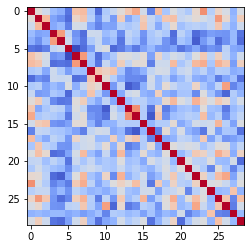

In [13]:
plt.imshow(mat, cmap = 'coolwarm')

Let's suppose we believe raw connectivity may predict sex in this dataset

Go ahead and extract the data we would need to generate a 2d matrix of our data (row = subs)

remember this is a symmetric matrix, so we should be asking do we need ALL cells in our matrix?

In [14]:
num_subs = len(mat_dict.keys())
x, y = mat.shape
num_feats = int(((x * y) - x) / 2)

mat_full = np.zeros((num_subs, num_feats))

# Generate an emptry matrix to store this data
for ind, (sub, mat) in enumerate(mat_dict.items()):
    mat_full[ind, :] = mat[np.triu_indices(mat.shape[0], k = 1)]
    
print(mat_full.shape)

(40, 406)


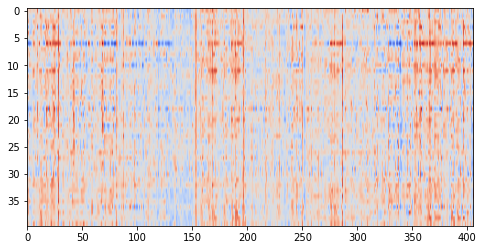

In [15]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.imshow(mat_full, aspect = 'auto', cmap = 'coolwarm')
plt.show()

In [16]:
X = mat_full

phen_data = rest_dataset['phenotypic']
Y = np.array([row[1] for row in phen_data])

print(f'X shape: {X.shape} Y shape: {Y.shape}')

X shape: (40, 406) Y shape: (40,)


In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import r2_score

Model Score: 0.9958206158436532


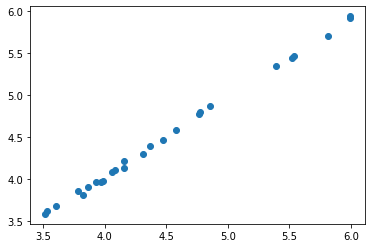

In [18]:
# Create the test train split
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.33, random_state=42)

# Create and fit the model
model = Ridge()
model.fit(X_tr, y_tr)

# Predict on our training data and plot (actual vs pred) and print the score, mse
pred = model.predict(X_tr)
plt.scatter(y_tr, pred.squeeze())

print(f'Model Score: {r2_score(y_tr, pred)}')

Model Score: -0.44506425379250714


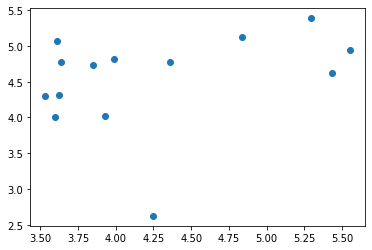

In [19]:
# Predict on our training data and plot (actual vs pred) and print the score, mse
pred = model.predict(X_te)
plt.scatter(y_te, pred.squeeze())

print(f'Model Score: {r2_score(y_te, pred)}')



[x] We did not tune the shrinkage parameter in our ridge regression and there may be a better value

[x] Our training dataset is too small to learn a meaningfull relatioship within our data

[ ] Our networks are not biologically plausible and do not reflect intrinstic brain networks

[ ] There is no relationship between resting state functional connectivity and age

[x] There are errors within the dataset

[x] There may be a relationship between resting state functional connectivity and age but it is not captured within our data for many possible reasons (artifact, small sample size, batch effects, etc)

[x] Some measure, other than raw functional connectivity, may better elucidate variability in age and the brain at rest


In [21]:
import networkx as nx

In [22]:
# Store our graphs for each subject
graphs_dict = {}

for key, val in mat_dict.items():
    
    # Apply thresholding and binarization
    val = np.abs(val)
    val[val > .2] = 1
    val[val < 1] = 0
    
    # Store graph
    g = nx.from_numpy_matrix(val)
    graphs_dict[key] = g

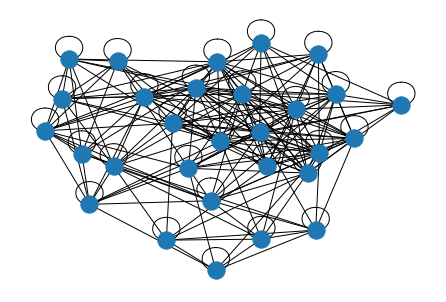

In [23]:
nx.draw_kamada_kawai(g)

In [24]:
# Store these in a dict
gMetric_dict = {'clust_co': [],
                'efficiecy': [],
                'degree': []}

for sub, g in graphs_dict.items():
    gMetric_dict['clust_co'].append(nx.average_clustering(g))
    gMetric_dict['efficiecy'].append(nx.global_efficiency(g))
    gMetric_dict['degree'].append(np.mean(nx.degree(g)))

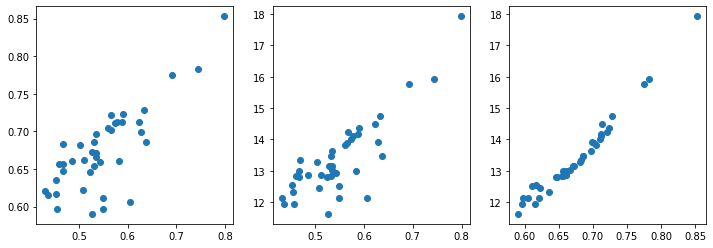

In [25]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

ax[0].scatter(gMetric_dict['clust_co'], gMetric_dict['efficiecy'])
ax[1].scatter(gMetric_dict['clust_co'], gMetric_dict['degree'])
ax[2].scatter(gMetric_dict['efficiecy'], gMetric_dict['degree'])